In [15]:
# !pip install kaggle
# !kaggle competitions download -c spaceship-titanic
import zipfile
import pandas as pd
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with zipfile.ZipFile('spaceship-titanic.zip') as zip:
    zip.printdir()
    zip.extractall(path='data/')

File Name                                             Modified             Size
sample_submission.csv                          2022-02-11 14:02:48        59902
test.csv                                       2022-02-11 14:02:48       372487
train.csv                                      2022-02-11 14:02:48       805421


In [36]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

print(df_train.shape, df_test.shape)

(8693, 14) (4277, 13)


In [4]:
df_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
# missing values
print("Total number of missing value is", sum(df_train.isna().sum()))
df_train.isna().sum()

Total number of missing value is 2324


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:>

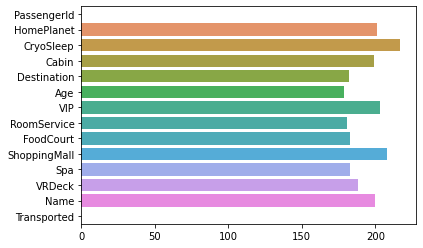

In [21]:
sns.barplot(x=df_train.isna().sum().values, y=df_train.columns)

In [37]:
df_train[df_train.isna().any(axis=1)].shape[0]

2087

In [38]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in num_cols:
    df_train[col].fillna(df_train[col].median(), inplace=True)

In [39]:
df_train[df_train.isna().any(axis=1)].shape[0]

1134

In [40]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [ ]:
df_train.dtypes

In [ ]:
df_train[['PassengerId', 'HomePlanet', 'Cabin','Destination','Name']] = df_train[['PassengerId', 'HomePlanet', 'Cabin','Destination','Name']].astype(str)
df_train[['CryoSleep', 'VIP']] = df_train[['CryoSleep', 'VIP']].astype(bool)

df_train.dtypes